In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [3]:
# Define output functions or `mean returns'
def G1(x):
    return np.log(x + 1) 

def G2(x):
    return np.sqrt(x)

# Define variance functions
def sigma_squared_linear(delta, k):
    return k * delta

def sigma_squared_quadratic(delta, k):
    return k * delta**2

def sigma_squared_constant(sigma):
    return sigma**2

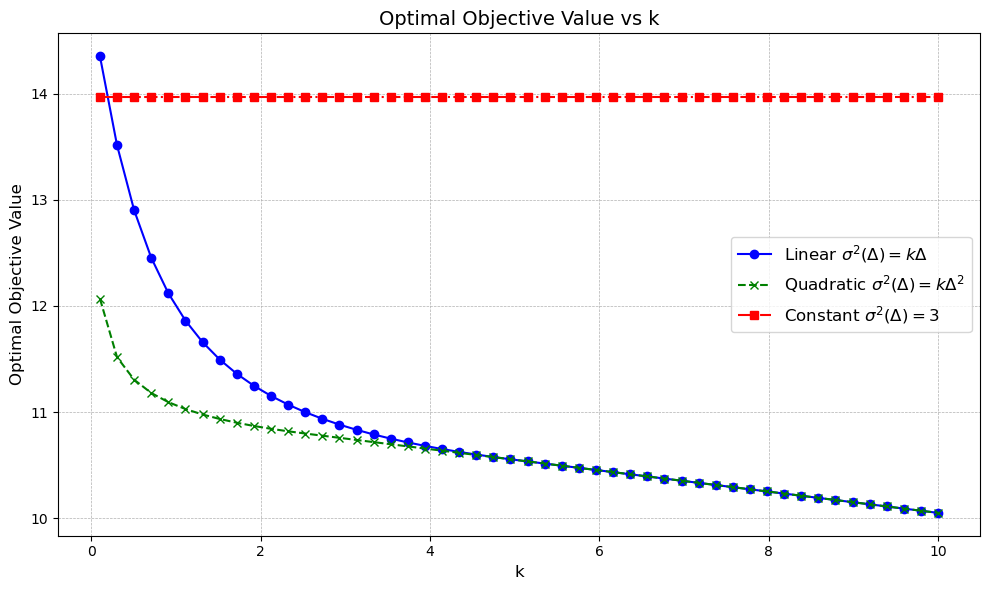

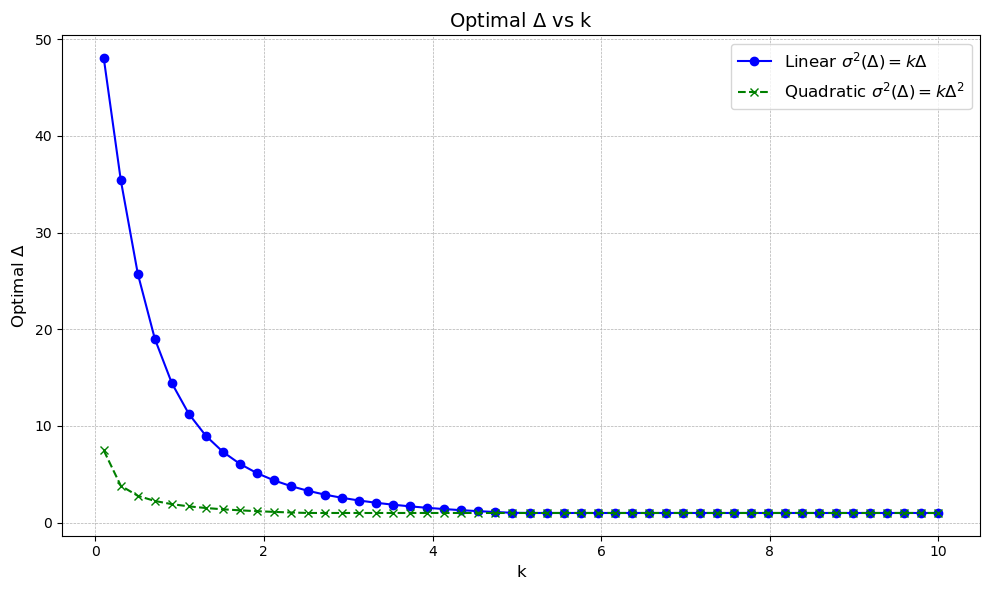

In [5]:
lambda_param = 0.1 # Lambda, tradeoff between mean and variance
k_values = np.linspace(0.1, 10, 50)  # Range of k values
constant_sigma = 3  # Constant variance

optimal_values_linear = []
optimal_values_quadratic = []
optimal_values_constant = []
optimal_delta_linear = []
optimal_delta_quadratic = []

# Perform simulation for linear variance
for k in k_values:
    delta = cp.Variable()
    sigma = cp.sqrt(sigma_squared_linear(delta, k))
    G1_term = cp.sqrt(100 - delta)
    G2_term = 1.1 * cp.sqrt(delta)
    penalty_term = lambda_param * sigma_squared_linear(delta, k)
    
    objective = cp.Maximize(G1_term + G2_term - penalty_term)
    constraints = [delta >= 1, delta <= 100]
    
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    optimal_values_linear.append(prob.value)
    optimal_delta_linear.append(delta.value)

# Perform simulation for quadratic variance
for k in k_values:
    delta = cp.Variable()
    sigma = cp.sqrt(sigma_squared_quadratic(delta, k))
    G1_term = cp.sqrt(100 - delta)
    G2_term = 1.1 * cp.sqrt(delta)
    penalty_term = lambda_param * sigma_squared_quadratic(delta, k)
    
    objective = cp.Maximize(G1_term + G2_term - penalty_term)
    constraints = [delta >= 1, delta <= 100]
    
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    optimal_values_quadratic.append(prob.value)
    optimal_delta_quadratic.append(delta.value)

# Perform simulation for constant variance
delta = cp.Variable()
sigma = constant_sigma
G1_term = cp.sqrt(100 - delta)
G2_term = 1.1* cp.sqrt(delta)
penalty_term = lambda_param * sigma_squared_constant(sigma)

objective = cp.Maximize(G1_term + G2_term - penalty_term)
constraints = [delta >= 1, delta <= 100]

prob = cp.Problem(objective, constraints)
prob.solve()

optimal_value_constant = prob.value

optimal_values_constant = [optimal_value_constant] * len(k_values)

# Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(k_values, optimal_values_linear, marker='o', color='blue', linestyle='-', label='Linear $\sigma^2(\Delta) = k\Delta$')
plt.plot(k_values, optimal_values_quadratic, marker='x', color='green', linestyle='--', label='Quadratic $\sigma^2(\Delta) = k\Delta^2$')
plt.plot(k_values, optimal_values_constant, marker='s', color='red', linestyle='-.', label='Constant $\sigma^2(\Delta) = 3$')

plt.xlabel('k', fontsize=12)
plt.ylabel('Optimal Objective Value', fontsize=12)
plt.title('Optimal Objective Value vs k', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig('optimal_objective_value_vs_k.png', dpi=500)
plt.show()

# Plotting the optimal Delta vs k
plt.figure(figsize=(10, 6))

plt.plot(k_values, optimal_delta_linear, marker='o', color='blue', linestyle='-', label='Linear $\sigma^2(\Delta) = k\Delta$')
plt.plot(k_values, optimal_delta_quadratic, marker='x', color='green', linestyle='--', label='Quadratic $\sigma^2(\Delta) = k\Delta^2$')

plt.xlabel('k', fontsize=12)
plt.ylabel('Optimal $\Delta$', fontsize=12)
plt.title('Optimal $\Delta$ vs k', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig('optimal_delta_vs_k.png', dpi=500)
plt.show()
